In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Qureshi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Qureshi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
# generate random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# add bias
X_b = np.c_[np.ones((100, 1)), X]
theta= np.random.randn(2,1)
print(X_b)
print(X_b.shape)
print(theta)

[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]
 [1.         1.41614516]
 [1.         0.04116899]
 [1.         1.9398197 ]
 [1.         1.66488528]
 [1.         0.42467822]
 [1.         0.36364993]
 [1.         0.36680902]
 [1.         0.60848449]
 [1.         1.04951286]
 [1.         0.86389004]
 [1.         0.58245828]
 [1.         1.22370579]
 [1.         0.27898772]
 [1.         0.5842893 ]
 [1.         0.73272369]
 [1.         0.91213997]
 [1.         1.57035192]
 [1.         0.39934756]
 [1.         1.02846888]
 [1.         1.18482914]
 [1.         0.09290083]
 [1.         1.2150897 ]
 [1.         0.34104825]
 [1.         0.13010319]
 [1.         1.89777107]
 [1.         1.93126407]
 [1.         1.6167947 ]
 [1.         0.60922754]
 [1.         0.19534423]
 [1.         1.36846605]
 [1.         0.88030499]


In [4]:
# BATCH GRADIENT
def b_g_d(X, y, eta=0.1, n_iter=1000):
    m = len(y)
    theta = np.random.randn(2, 1)
    for i in range(n_iter):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        g = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * g
    return theta

theta_bgd = b_g_d(X_b, y)
print(theta_bgd)

[[4.36321017]
 [2.74279576]]


In [7]:
# MINI BATCH GRADIENT
def m_g_d(X, y, eta=0.1, n_iter=1000,batch_size=20):
    m = len(y)
    theta = np.random.randn(2, 1)
    for i in range(n_iter):
        shuffled_index=np.random.permutation(m)
        x_s=X[shuffled_index]
        y_s=y[shuffled_index]
        for j in range(0,m,batch_size):
            xi=x_s[j:j+batch_size]
            yi=y_s[j:j+batch_size]
            g=2/len(xi)*xi.T.dot(xi.dot(theta)-yi)
            theta=theta-eta*g
    return theta
theta_mgd=m_g_d(X_b,y)
print(theta_mgd)

[[4.22225214]
 [2.77715129]]


In [9]:
# Stochastic Gradient Descent
def s_g_d(X, y, eta=0.1, n_iter=1000):
    m = len(y)  
    theta = np.random.randn(2, 1) 
    for i in range(n_iter):
         for j in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + 1]  
            yi = y[random_index:random_index + 1]  
            g = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - eta * g
    return theta
theta_sgd=s_g_d(X_b,y)
print(theta_sgd)

[[4.7030574 ]
 [3.04120742]]


C:\Users\Qureshi\AppData\Local\Temp\ipykernel_21800\1337118959.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")


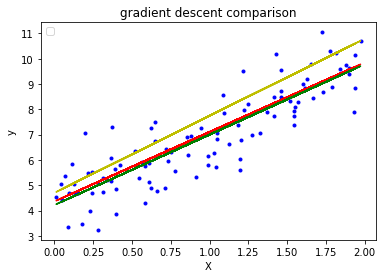

In [15]:
#plot
def plot_gd(X,y, theta_bgd, theta_mgd, theta_sgd) :
    plt.plot(X,y, 'b.')
    y_pred_bgd=X_b.dot (theta_bgd)
    y_pred_mgd=X_b.dot (theta_mgd)
    y_pred_sgd=X_b.dot(theta_sgd)
    plt.plot(X,y_pred_bgd, 'r-')
    plt.plot(X,y_pred_mgd, 'g-')
    plt.plot(X,y_pred_sgd, 'y-')
    plt.xlabel ( 'X')
    plt.ylabel('y')
    plt.legend(loc="upper left")
    plt.title("gradient descent comparison")
    plt.show
plot_gd(X,y, theta_bgd, theta_mgd, theta_sgd)

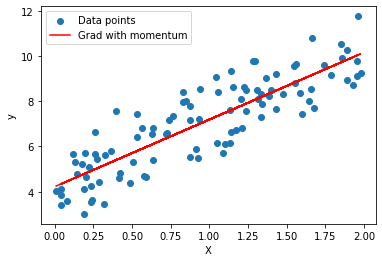

In [22]:
#GRAD WITH MOMENTUM
#import numpy as np
#import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 random samples from 0 to 2
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Add bias term (intercept) to the feature matrix
X_b = np.c_[np.ones((100, 1)), X]

# Initialize theta
theta = np.random.randn(2, 1)

# Gradient Descent with Momentum function
def gd_m(X, y, theta, eta, gamma, n_iter):
    m = len(y)
    vel = np.zeros(theta.shape)  # Initialize velocity
    for i in range(n_iter):
        g = (2 / m) * X.T.dot(X.dot(theta) - y)  # Compute gradient
        vel = gamma * vel + eta * g               # Update velocity
        theta = theta - vel                        # Update theta
    return theta

# Perform Gradient Descent with Momentum
theta_gd_m = gd_m(X_b, y, theta, eta=0.01, gamma=0.9, n_iter=1000)

# Generate predictions based on final theta
y_gd_m = X_b.dot(theta_gd_m)

# Plotting
plt.scatter(X, y, label='Data points')  # Scatter plot for original data points
plt.plot(X, y_gd_m, 'r-', label='Grad with momentum')  # Line plot for predictions
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


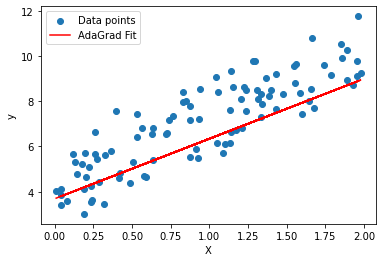

In [23]:
#ADAGRAD
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 random samples from 0 to 2
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Add bias term (intercept) to the feature matrix
X_b = np.c_[np.ones((100, 1)), X]

# Initialize theta
theta = np.random.randn(2, 1)
eta=0.01
n_iter=1000
epsilon=1e-8
S=np.zeros(theta.shape)
# AdaGrad function
def adagrad(X, y, theta, eta, n_iter):
    m = len(y)
    grad_squared = np.zeros(theta.shape)  # Initialize squared gradients
    for i in range(n_iter):
        g = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)  # Compute gradient
        grad_squared += g ** 2  # Accumulate squared gradients
        adjusted_eta = eta / (np.sqrt(grad_squared) + 1e-8)  # Adjust learning rate
        theta = theta - adjusted_eta * g  # Update theta
    return theta

# Perform AdaGrad
theta_adagrad = adagrad(X_b, y, theta, eta=0.1, n_iter=1000)

# Generate predictions based on final theta
y_b = X_b.dot(theta_adagrad)

# Plotting
plt.scatter(X, y, label='Data points')  # Scatter plot for original data points
plt.plot(X, y_b, 'r-', label='AdaGrad Fit')  # Line plot for predictions
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


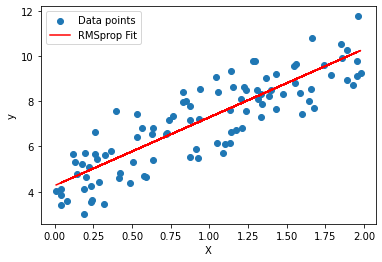

In [24]:
#RMS PROP
#import numpy as np
#import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 random samples from 0 to 2
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Add bias term (intercept) to the feature matrix
X_b = np.c_[np.ones((100, 1)), X]

# Initialize theta
theta = np.random.randn(2, 1)

# RMSprop function
def rmsprop(X, y, theta, eta, beta, n_iter):
    m = len(y)
    grad_squared = np.zeros(theta.shape)  # Initialize squared gradients
    for i in range(n_iter):
        g = (2 / m) * X.T.dot(X.dot(theta) - y)  # Compute gradient
        grad_squared = beta * grad_squared + (1 - beta) * g ** 2  # Update squared gradients
        adjusted_eta = eta / (np.sqrt(grad_squared) + 1e-8)  # Adjust learning rate
        theta = theta - adjusted_eta * g  # Update theta
    return theta

# Perform RMSprop
theta_rmsprop = rmsprop(X_b, y, theta, eta=0.1, beta=0.9, n_iter=1000)

# Generate predictions based on final theta
y_rmsprop = X_b.dot(theta_rmsprop)

# Plotting
plt.scatter(X, y, label='Data points')  # Scatter plot for original data points
plt.plot(X, y_rmsprop, 'r-', label='RMSprop Fit')  # Line plot for predictions
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
